In [ ]:
R = 8.314
T = 298.15

def p1(E_inter_liquid):
    """
    E_inter_liquid: float, the interaction energy between the liquid and the solid
    return: float, the energy of the solid-liquid interface
    """
    delta_hvap = E_inter_liquid + R * T
    return delta_hvap

def 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        5.000e+00, 7.000e+00, 1.500e+01, 2.000e+01, 3.300e+01, 3.500e+01,
        7.200e+01, 1.170e+02, 1.520e+02, 1.990e+02, 2.910e+02, 4.010e+02,
        5.430e+02, 6.320e+02, 8.750e+02, 1.000e+03, 1.223e+03, 1.420e+03,
        1.635e+03, 1.928e+03, 2.208e+03, 2.304e+03, 2.501e+03, 2.662e+03,
        2.700e+03, 2.804e+03, 2.665e+03, 2.699e+03, 2.552e+03, 2.324e+03,
        2.169e+03, 1.909e+03, 1.734e+03, 1.545e+03, 1.282e+03, 1.169e+03,
        9.210e+02, 7.030e+02, 6.290e+0

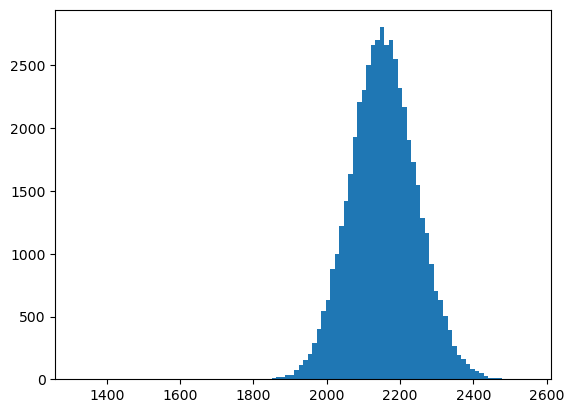

In [33]:
import pandas as pd
df = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/production_test_benzene_full_equil_n100_100ns.dat')
df
#hist of Potential Energy
import matplotlib.pyplot as plt
plt.hist(df['Potential Energy (kJ/mole)'], bins=100)

In [34]:
#also get average
df['Potential Energy (kJ/mole)'].mean()

2155.041554114781

In [23]:
from openff.toolkit.topology import Molecule, Topology
from openff.units import unit
from openff.toolkit.typing.engines.smirnoff import ForceField
from openff.interchange import Interchange
from openff.interchange.drivers import get_openmm_energies
SMILES = "c1ccccc1"
molecule = Molecule.from_smiles(SMILES)
molecule.generate_conformers(n_conformers=20, rms_cutoff=0.1 * unit.angstrom),
topology = molecule.to_topology()
sage = ForceField("openff_unconstrained-2.1.0.offxml")
interchange = Interchange.from_smirnoff(force_field=sage, topology=topology)
interchange.box = unit.Quantity([4, 4, 4], unit.nanometer)
for conformer in molecule.conformers:
    interchange.positions = conformer
    openmm_energies = get_openmm_energies(interchange).total_energy.m_as(kj_mol)
    print(openmm_energies)
energies_gass = get_openmm_energies(interchange,combine_nonbonded_forces=False,detailed=True)


42.61939220659893


In [14]:
#same for liquid box to compare
import mdtraj as md
import openmm
from openmm.app.pdbfile import PDBFile
import parmed
def load_prmed(schema_id):
    pdb_file = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiment_daata/{schema_id}_build_coordinates/output.pdb'
    parameterized_system = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiment_daata/{schema_id}_assign_parameters/system.xml'
    omm_top = PDBFile(pdb_file).topology
    omm_sys = openmm.XmlSerializer.deserialize(open(parameterized_system).read())
    rdk_pmd = parmed.openmm.load_topology(omm_top, omm_sys, xyz=pdb_file)
    return rdk_pmd
path = 'liquid_phase_experiment_daata/test_benzene_full_equil_n100.h5'
key = 'adb70b0f9c8b43a9a9373ada67a25377'
prm_obj = load_prmed(key)
topology_openff = Topology.from_openmm(prm_obj.topology, unique_molecules=[Molecule.from_smiles(SMILES)])
#get first frame of simulation
traj = md.load('liquid_phase_experiment_daata/test_benzene_full_equil_n100.h5')
top = traj.topology
first_frame = traj[-1]
first_frame.save_pdb('first_frame.pdb')
interchange = Interchange.from_smirnoff(force_field=sage, topology=topology_openff)
interchange.positions = first_frame.xyz[0] * unit.nanometer
openmm_energies = get_openmm_energies(interchange).total_energy.m_as(kj_mol)
print(openmm_energies)

3308.3512020769117


In [18]:
energies_all = get_openmm_energies(interchange,combine_nonbonded_forces=False,detailed=True)

In [22]:
energies_all.dict()['energies']

{'vdW': -2241.7370836461014 <Unit('kilojoule / mole')>,
 'Electrostatics': 853.8858121904559 <Unit('kilojoule / mole')>,
 'vdW 1-4': 2328.9436301472565 <Unit('kilojoule / mole')>,
 'Electrostatics 1-4': -67.0879405520681 <Unit('kilojoule / mole')>,
 'Torsion': 1185.5840354257539 <Unit('kilojoule / mole')>,
 'Angle': 1248.7628039868653 <Unit('kilojoule / mole')>,
 'Bond': 6.740876063001434e-07 <Unit('kilojoule / mole')>}

In [26]:
#divide all values by 100
for key in energies_all.dict()['energies']:
    print(key, energies_all.dict()['energies'][key]/100)

vdW -22.417370836461014 kilojoule / mole
Electrostatics 8.538858121904559 kilojoule / mole
vdW 1-4 23.289436301472566 kilojoule / mole
Electrostatics 1-4 -0.670879405520681 kilojoule / mole
Torsion 11.85584035425754 kilojoule / mole
Angle 12.487628039868653 kilojoule / mole
Bond 6.740876063001435e-09 kilojoule / mole


In [25]:
energies_gass.dict()['energies']

{'vdW': -0.7677894882091111 <Unit('kilojoule / mole')>,
 'Electrostatics': 10.656487362670859 <Unit('kilojoule / mole')>,
 'vdW 1-4': 26.39378872098 <Unit('kilojoule / mole')>,
 'Electrostatics 1-4': -0.6892651618640189 <Unit('kilojoule / mole')>,
 'Torsion': 8.660144455719932e-08 <Unit('kilojoule / mole')>,
 'Angle': 3.1828939077378613 <Unit('kilojoule / mole')>,
 'Bond': 3.8432767888476467 <Unit('kilojoule / mole')>}

In [35]:
42.61939220659893 - 2155.041554114781/100 + (0.001* 8.314 * 298.15)

23.54779576545112

In [15]:
openmm_energies/100

33.08351202076912

In [4]:
from rdkit import Chem
from rdkit.Chem import rdDistGeom
benzene = Chem.AddHs(Chem.MolFromSmiles('c1ccccc1'))
rdDistGeom.EmbedMolecule(benzene)
benzene

In [ ]:
#get first frame of simulation
traj = md.load('liquid_phase_experiment_daata/test_benzene_full_equil_n100.h5')
top = traj.topology
interchange = Interchange.from_smirnoff(force_field=sage, topology=topology_openff)
interchange.positions = first_frame.xyz[0] * unit.nanometer
openmm_energies = get_openmm_energies(interchange).total_energy.m_as(kj_mol)
print(openmm_energies)

In [5]:
import mdtraj as md
import openmm
from openff.toolkit.topology import Molecule, Topology
from openff.units import unit
from openff.toolkit.typing.engines.smirnoff import ForceField
from openff.interchange import Interchange
from openff.interchange.drivers import get_openmm_energies

import mdtraj as md
import openmm
from openmm.app.pdbfile import PDBFile
import parmed

In [15]:
traj = md.load('liquid_phase_experiment_daata/test_benzene_full_equil_n100_5ns.h5')
ff = ForceField("openff_unconstrained-2.1.0.offxml")
def load_prmed(schema_id):
    pdb_file = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiment_daata/{schema_id}_build_coordinates/output.pdb'
    parameterized_system = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiment_daata/{schema_id}_assign_parameters/system.xml'
    omm_top = PDBFile(pdb_file).topology
    omm_sys = openmm.XmlSerializer.deserialize(open(parameterized_system).read())
    rdk_pmd = parmed.openmm.load_topology(omm_top, omm_sys, xyz=pdb_file)
    return rdk_pmd
key = 'adb70b0f9c8b43a9a9373ada67a25377'
SMILES = "c1ccccc1"
prm_obj = load_prmed(key)
topology_openff = Topology.from_openmm(prm_obj.topology, unique_molecules=[Molecule.from_smiles(SMILES)])
interchange = Interchange.from_smirnoff(force_field=ff, topology=topology_openff)
frame = traj[0]
interchange.positions = frame.xyz[0] * unit.nanometer
openmm_energies = get_openmm_energies(interchange).total_energy.m_as(unit.kilojoule_per_mole)
print(openmm_energies)

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


3387.9219483329084


In [30]:
energies_all = get_openmm_energies(interchange,combine_nonbonded_forces=False,detailed=True)
energies_all

EnergyReport(energies={'vdW': <Quantity(-2139.77697, 'kilojoule / mole')>, 'Electrostatics': <Quantity(877.580471, 'kilojoule / mole')>, 'vdW 1-4': <Quantity(2324.68338, 'kilojoule / mole')>, 'Electrostatics 1-4': <Quantity(-66.5476117, 'kilojoule / mole')>, 'Torsion': <Quantity(1183.90606, 'kilojoule / mole')>, 'Angle': <Quantity(1208.07667, 'kilojoule / mole')>, 'Bond': <Quantity(7.49082762e-07, 'kilojoule / mole')>})

In [34]:
energies_all.energies['vdW'].m_as(unit.kilojoule_per_mole)

-2139.776970792278

In [38]:
vdws,electrostatics,vdw14,electrostatics14 = [],[],[],[]
from tqdm import tqdm
for frame in tqdm(traj):
    interchange.positions = frame.xyz[0] * unit.nanometer
    openmm_energies = get_openmm_energies(interchange,combine_nonbonded_forces=False,detailed=True)
    vdws.append(openmm_energies.energies['vdW'].m_as(unit.kilojoule_per_mole))
    electrostatics.append(openmm_energies.energies['Electrostatics'].m_as(unit.kilojoule_per_mole))
    vdw14.append(openmm_energies.energies['vdW 1-4'].m_as(unit.kilojoule_per_mole))
    electrostatics14.append(openmm_energies.energies['Electrostatics 1-4'].m_as(unit.kilojoule_per_mole))

100%|██████████| 500/500 [09:44<00:00,  1.17s/it]


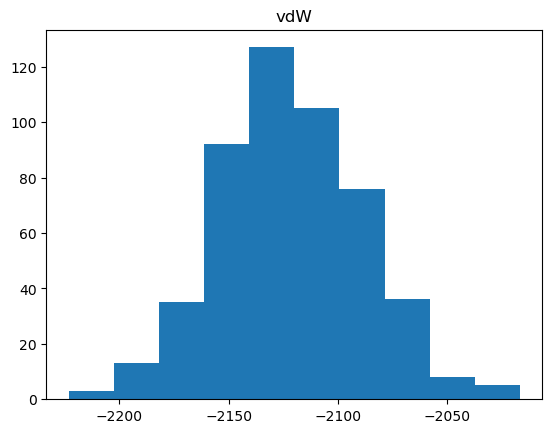

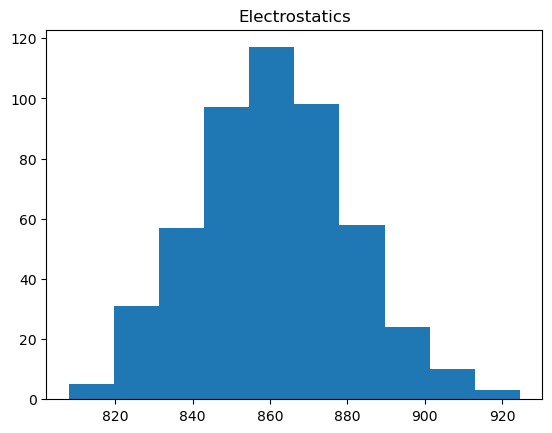

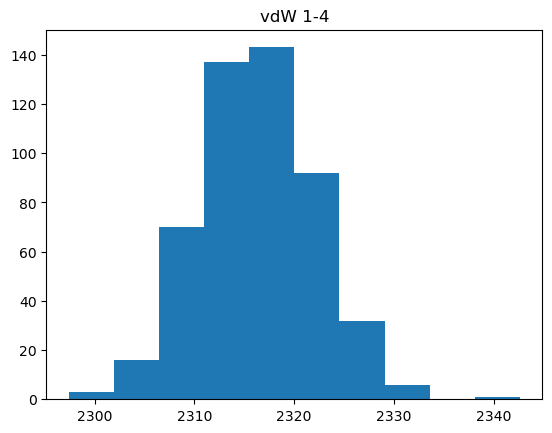

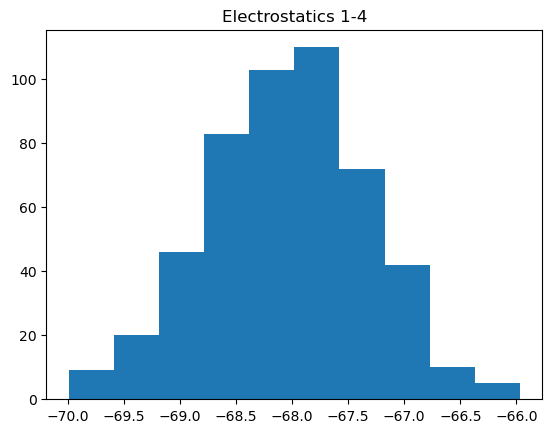

In [41]:
#histograms of the energies
import matplotlib.pyplot as plt
plt.hist(vdws, bins=10)
plt.title('vdW')
plt.show()
plt.hist(electrostatics, bins=10)
plt.title('Electrostatics')
plt.show()
plt.hist(vdw14, bins=10)
plt.title('vdW 1-4')
plt.show()
plt.hist(electrostatics14, bins=10)
plt.title('Electrostatics 1-4')
plt.show()

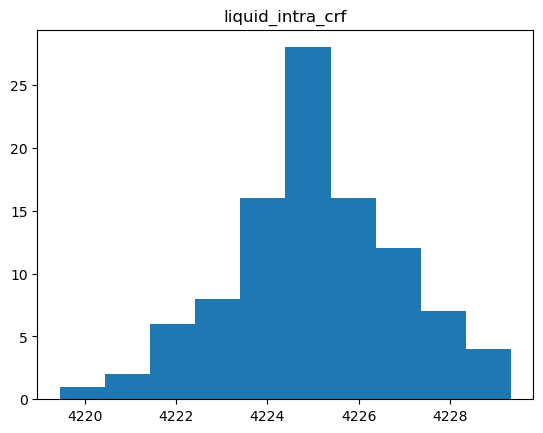

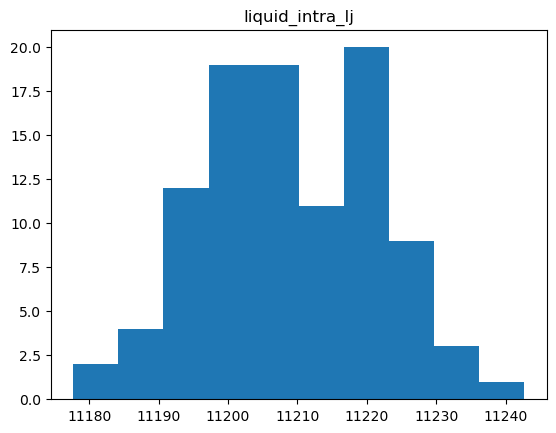

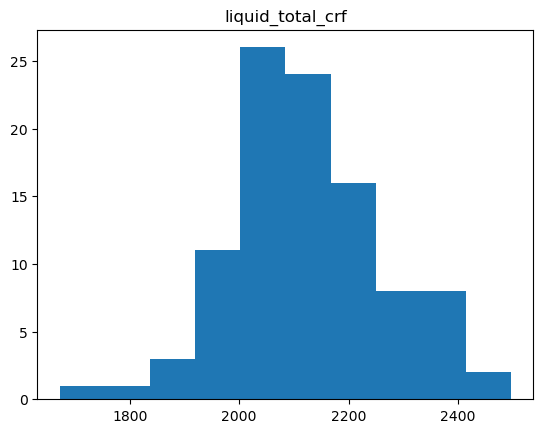

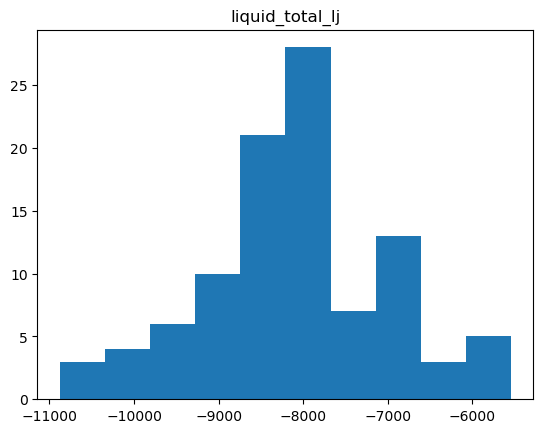

In [75]:
import pickle #open energies_100_benzene_5ns.pkl
with open('energies_100_benzene_5ns.pkl', 'rb') as f:
    energie_list = pickle.load(f)
for term in ['liquid_intra_crf','liquid_intra_lj','liquid_total_crf','liquid_total_lj']:    
    energies_all_liquid_intra_crf = [ene[term] for ene in energie_list]
    energies_all_liquid_intra_crf_array = np.array(energies_all_liquid_intra_crf)
    energies_all_liquid_intra_crf_array_sum = np.sum(energies_all_liquid_intra_crf_array, axis=1)
    plt.hist(energies_all_liquid_intra_crf_array_sum, bins=10)
    plt.title(term)
    plt.show()

In [45]:
len(energie_list),len(energie_list[0])

(100, 6)

In [47]:
len(energie_list[0]['liquid_intra_crf'])

500

In [64]:
energies_all_liquid_intra_crf = [ene['liquid_intra_crf'] for ene in energie_list]
energies_all_liquid_intra_crf_flat = [item for sublist in energies_all_liquid_intra_crf for item in sublist]
len(energies_all_liquid_intra_crf_flat)
print(np.mean(energies_all_liquid_intra_crf_flat))


8.45002839800355


In [62]:
import numpy as np
energies_all_liquid_intra_crf = [ene['liquid_intra_lj'] for ene in energie_list]
energies_all_liquid_intra_crf_flat = [item for sublist in energies_all_liquid_intra_crf for item in sublist]
print(np.mean(energies_all_liquid_intra_crf_flat))



22.417681727943002


In [72]:
energies_all_liquid_intra_crf_array = np.array(energies_all_liquid_intra_crf)
#summ over all molecules
energies_all_liquid_intra_crf_array.sum(axis=0).shape

(500,)

(array([  3.,  15.,  39.,  87., 135., 103.,  73.,  32.,  10.,   3.]),
 array([-1816.85747902, -1775.59497892, -1734.33247883, -1693.06997873,
        -1651.80747864, -1610.54497855, -1569.28247845, -1528.01997836,
        -1486.75747827, -1445.49497817, -1404.23247808]),
 <BarContainer object of 10 artists>)

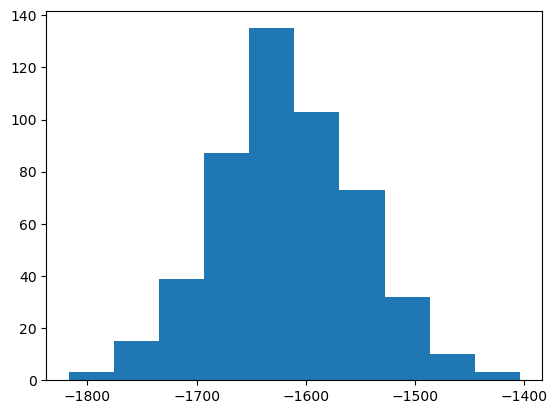

In [74]:
energies_all_liquid_intra_crf_array.sum(axis=0).tolist()
#plot
plt.hist(energies_all_liquid_intra_crf_array.sum(axis=0), bins=10)

In [27]:
energie_list[0].keys()

dict_keys(['liquid_intra_crf', 'liquid_intra_lj', 'liquid_total_crf', 'liquid_total_lj', 'liquid_intra_ene', 'liquid_total_ene'])

In [76]:
from Composer import SolutionComposer
import mdtraj as md
import parmed
from Composer import LiquidComposer
import mdtraj as md
import openmm
from openmm.app.pdbfile import PDBFile
import parmed
from Simulator import SolutionSimulator


schema_id = 'adb70b0f9c8b43a9a9373ada67a25377'
pdb_file = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiment_daata/{schema_id}_build_coordinates/output.pdb'
parameterized_system = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiment_daata/{schema_id}_assign_parameters/system.xml'
omm_top = PDBFile(pdb_file).topology
omm_sys = openmm.XmlSerializer.deserialize(open(parameterized_system).read())
rdk_pmd = parmed.openmm.load_topology(omm_top, omm_sys, xyz=pdb_file)
smiles = 'c1ccccc1'
traj_5ns = md.load('liquid_phase_experiment_daata/test_benzene_full_equil_n100_5ns.h5')
mdfp_5ns = SolutionComposer.run(traj, rdk_pmd,smiles=smiles)
mdfp_5ns.mdfp

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


{'2d_counts': [6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'water_intra_crf': [635.0920068529404, 20.0681538067759, 635.1927149214607],
 'water_intra_lj': [312.7862069238647, 32.858825710340646, 311.55619478430503],
 'water_total_crf': [635.0920068529404, 20.0681538067759, 635.1927149214607],
 'water_total_lj': [312.7862069238647, 32.858825710340646, 311.55619478430503],
 'water_intra_ene': [947.878213776805, 39.680055843862085, 947.9558900322655],
 'water_total_ene': [947.878213776805, 39.680055843862085, 947.9558900322655],
 'water_rgyr': [1.2352665551527648, 0.00563381562690064, 1.2352755417208225],
 'water_sasa': [0.57106215, 0.46374443, 0.53367686]}